In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#  Load Data 
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

#  Merge DataFrames
merged_df = transactions.merge(products, on="ProductID", how="left").merge(customers, on="CustomerID", how="left")


In [23]:
# Create summary statistics for customers
customer_summary = merged_df.groupby('CustomerID').agg({
    'Quantity': 'sum',  
    'TotalValue': 'sum', 
    'Region': 'first'
}).reset_index()

# One-hot encode the 'Region' column
customer_summary = pd.get_dummies(customer_summary, columns=['Region'], drop_first=True)


In [24]:
#  Scaling the Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary.drop(columns=['CustomerID']))

# Convert scaled features to a DataFrame
scaled_df = pd.DataFrame(scaled_features, 
                         columns=customer_summary.columns[1:], 
                         index=customer_summary['CustomerID'])


In [25]:
# Perform Clustering
# Find the optimal number of clusters using the Elbow Method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

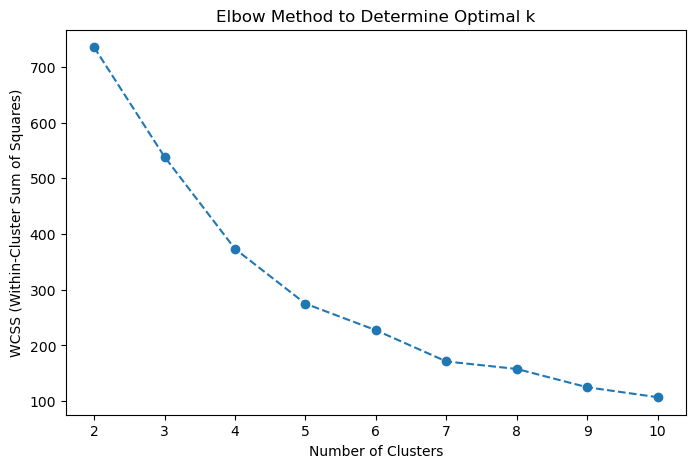

In [26]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

In [27]:
# optimal number of clusters based on the elbow plot 
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
customer_summary['Cluster'] = clusters

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9475622901515466


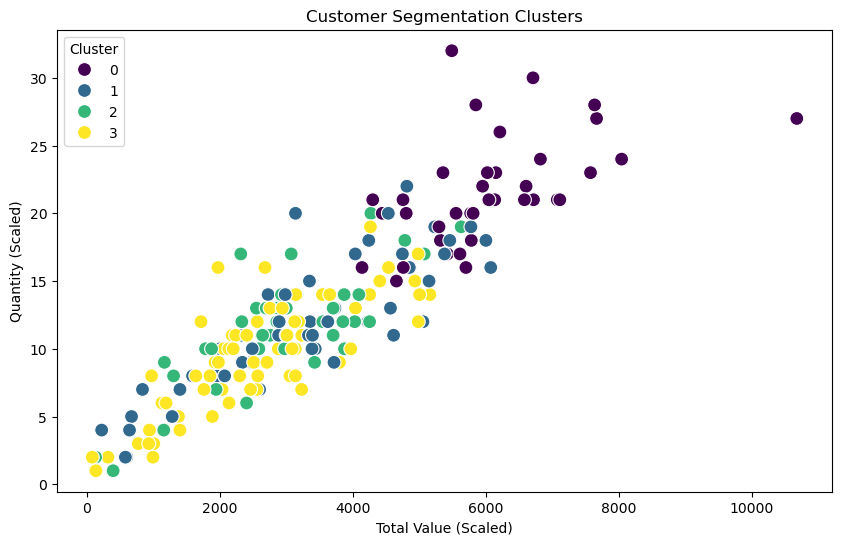

In [29]:
# Visualize two primary features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_summary, x='TotalValue', y='Quantity', hue='Cluster', palette='viridis', s=100)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Total Value (Scaled)")
plt.ylabel("Quantity (Scaled)")
plt.legend(title="Cluster")
plt.show()

In [30]:
customer_summary.to_csv("Customer_Segmentation_Results.csv", index=False)
print("Customer segmentation results saved to 'Customer_Segmentation_Results.csv'")

Customer segmentation results saved to 'Customer_Segmentation_Results.csv'
